Здравствуйте, меня зовут Саша и вот мое решение данной задачи. Из-за некоторых ограничений в характеристиках своего ноутбука, я обычно использую Google Colab Pro, соответственно этот код был написан и протестирован там.

Вся программа разделена на 4 части:
1. Установка библиотек
2. Импорты библиотек
3. Основная часть(загрузка модели, её обучение и последующее сохранение)
4. Код для теста модели(проверка её на некоторых задачах из тестового датасета)

Как можно заметить, я сохраняю модель в google drive, так что если вы не используете google colab, то вам нужно будет поменять эти строчки:
```python
from google.colab import drive
drive.mount('/content/drive')
OUTPUT_DIR = "/content/drive/MyDrive/Qwen"
SAVE_DIR = "/content/drive/MyDrive/Qwen_full"
```

Говоря о структуре основной части кода, я могу выделить основные моменты:
1. Конфигурация
2. Загрузка токенизатора и датасета
3. Токенизация и маскирование меток
4. Загрузка модели
5. Настройка LoRA (PEFT)
6. Инициализация SFTTrainer
7. Обучение и сохранение
8. Построение графика потерь

P.S. Я обучаю модель только на 5000 шагах:
```python
trainer.args.max_steps = 5000
```
Кстати, вот ссылка на дообученную модель(папку с файлами):
[гугл диск](https://drive.google.com/drive/folders/108qDzPK7Bf7fJEdBJG8rhklCYL_A_fjB?usp=sharing)

Если будут вопросы или какие-то трудности с пониманием моего кода и/или модели и других процессов, вот мой тг: @bez_organov

In [1]:
!pip install transformers datasets accelerate trl peft bitsandbytes safetensors evaluate matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.9/511.9 kB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 MB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 7.6 MB/s eta 0:00:00


In [2]:
import os
import re
import math
from tqdm.auto import tqdm

import torch
from datasets import load_dataset, get_dataset_config_names
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
from peft import LoraConfig
from trl import SFTTrainer, SFTConfig
import matplotlib.pyplot as plt

Loading tokenizer...
Dataset configs (if reachable):
['main', 'socratic']
Loading openai/gsm8k (trying configs: ['main', 'socratic'])...
Loaded dataset config: main
Formatting dataset prompts...


Map:   0%|          | 0/7473 [00:00<?, ? examples/s]

Map:   0%|          | 0/1319 [00:00<?, ? examples/s]

Tokenizing and preparing labels (batched)...


Map:   0%|          | 0/7473 [00:00<?, ? examples/s]

Map:   0%|          | 0/1319 [00:00<?, ? examples/s]

Loading model (attempting 8-bit if configured)...


Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Preparing LoRA (PEFT) config...
Building SFTConfig with explicit training parameters...
Initializing SFTTrainer (dynamic arg filtering)...
SFTTrainer.__init__ supports these params: ['model', 'args', 'data_collator', 'train_dataset', 'eval_dataset', 'processing_class', 'compute_loss_func', 'compute_metrics', 'callbacks', 'optimizers', 'optimizer_cls_and_kwargs', 'preprocess_logits_for_metrics', 'peft_config', 'formatting_func']
Passing to SFTTrainer only: ['model', 'args', 'train_dataset', 'eval_dataset', 'peft_config', 'formatting_func']


Truncating train dataset:   0%|          | 0/7473 [00:00<?, ? examples/s]

Truncating eval dataset:   0%|          | 0/1319 [00:00<?, ? examples/s]

Trainer.tokenizer is now deprecated. You should use `Trainer.processing_class = processing_class` instead.


tokenizer was not accepted by SFTTrainer.__init__; attached as trainer.tokenizer.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Starting training...


/usr/local/lib/python3.12/dist-packages/bitsandbytes/autograd/_functions.py:186: UserWarning: MatMul8bitLt: inputs will be cast from torch.float32 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")
/usr/local/lib/python3.12/dist-packages/bitsandbytes/autograd/_functions.py:186: UserWarning: MatMul8bitLt: inputs will be cast from torch.bfloat16 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")


Step,Training Loss
50,0.706800
100,0.490700
150,0.460100
200,0.441900
250,0.438900
300,0.423100
350,0.422600
400,0.421400
450,0.410600
500,0.407500


Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
/usr/local/lib/python3.12/dist-packages/peft/utils/save_and_load.py:300: UserWarning: Setting `save_embedding_layers` to `True` as the embedding layer has been resized during finetuning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/bitsandbytes/autograd/_functions.py:186: UserWarning: MatMul8bitLt: inputs will be cast from torch.float32 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")
/usr/local/lib/python3.12/dist-packages/bitsandbytes/autograd/_functions.py:186: UserWarning: MatMul8bitLt: inputs will be cast from torch.bfloat16 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")
Using the `WANDB_DISABLED` environment v

Saving adapters and tokenizer to: /content/drive/MyDrive/Qwen


/usr/local/lib/python3.12/dist-packages/peft/utils/save_and_load.py:300: UserWarning: Setting `save_embedding_layers` to `True` as the embedding layer has been resized during finetuning.
  warnings.warn(


Merging LoRA adapters into base model...
Saving merged model to: /content/drive/MyDrive/Qwen_full
✅ Full model saved successfully!


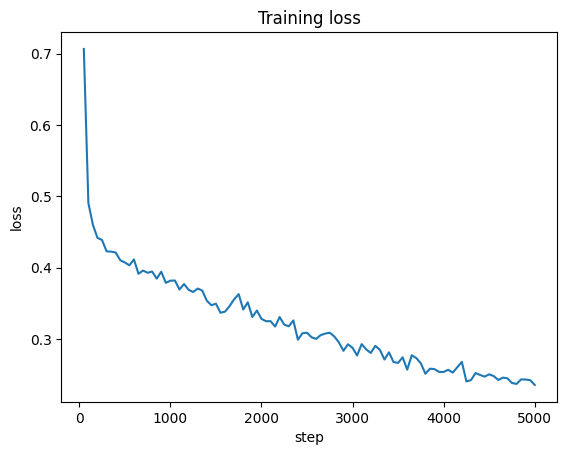

In [7]:
# ------------------ USER CONFIG ------------------
os.environ["WANDB_DISABLED"] = "true"
MODEL_ID = "Qwen/Qwen2.5-Math-1.5B"
DATASET_ID = "openai/gsm8k"
DATASET_CONFIGS_TRY = ["main", "socratic"]
OUTPUT_DIR = "./qwen2.5-math-sft-gsm8k"
MAX_LENGTH = 1024
PER_DEVICE_TRAIN_BATCH_SIZE = 2
PER_DEVICE_EVAL_BATCH_SIZE = 2
NUM_TRAIN_EPOCHS = 4
LEARNING_RATE = 3e-5
GRADIENT_ACCUMULATION_STEPS = 8
MAX_NEW_TOKENS = 256
TEMPERATURE = 0.0
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
SAVE_CHECKPOINTS_STEPS = 200
SEED = 42
USE_8BIT = True

# LoRA / PEFT config
LORA_R = 16
LORA_ALPHA = 32
LORA_DROPOUT = 0.1

TARGET_MODULES = ["q_proj", "v_proj", "k_proj", "o_proj", "gate_proj", "up_proj", "down_proj"]

os.makedirs(OUTPUT_DIR, exist_ok=True)
torch.manual_seed(SEED)

# ------------------ Load tokenizer ------------------
print("Loading tokenizer...")
tokenizer = AutoTokenizer.from_pretrained(MODEL_ID, use_fast=False)
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({"pad_token": tokenizer.eos_token})

# ------------------ Load dataset ------------------
print("Dataset configs:")
try:
    print(get_dataset_config_names(DATASET_ID))
except Exception:
    pass

print(f"Loading {DATASET_ID} (trying configs: {DATASET_CONFIGS_TRY})...")
dataset = None
for cfg in DATASET_CONFIGS_TRY:
    try:
        dataset = load_dataset(DATASET_ID, cfg)
        print(f"Loaded dataset config: {cfg}")
        break
    except Exception as e:
        print(f"Config {cfg} failed: {e}")

if dataset is None:
    raise RuntimeError(f"Failed to load any config for dataset {DATASET_ID} from {DATASET_CONFIGS_TRY}")

train_ds = dataset.get("train")
eval_ds = dataset.get("test") or dataset.get("validation")
if train_ds is None or eval_ds is None:
    raise RuntimeError("Train or test/validation split missing in dataset")

# ------------------ Prompt ------------------
def make_prompt(example):
    question = example["question"].strip()
    answer = example["answer"].strip()

    prompt = f"Question: {question}\nLet's think step by step:\n"
    completion = answer

    return {"text": prompt + completion, "prompt_only": prompt}


print("Formatting dataset prompts...")
train_ds = train_ds.map(make_prompt, remove_columns=train_ds.column_names)
eval_ds = eval_ds.map(make_prompt, remove_columns=eval_ds.column_names)

# ------------------ Tokenization and label-masking ------------------
def tokenize_and_mask(batch):
    enc = tokenizer(batch["text"], truncation=True, max_length=MAX_LENGTH, padding=False)
    prompt_enc = tokenizer(batch["prompt_only"], truncation=True, max_length=MAX_LENGTH, padding=False)

    input_ids = enc["input_ids"]
    prompt_ids = prompt_enc["input_ids"]

    labels = []
    for i in range(len(input_ids)):
        label = input_ids[i].copy()

        prompt_len = len(prompt_ids[i])
        label[:prompt_len] = [-100] * prompt_len

        labels.append(label)

    enc["labels"] = labels
    return enc

print("Tokenizing and preparing labels...")
train_tok = train_ds.map(tokenize_and_mask, batched=True, remove_columns=["text", "prompt_only"])
eval_tok = eval_ds.map(tokenize_and_mask, batched=True, remove_columns=["text", "prompt_only"])

train_tok.set_format(type="torch")
eval_tok.set_format(type="torch")

# ------------------ Load model ------------------


print("Loading model...")
try:
    if USE_8BIT:
        bnb_config = BitsAndBytesConfig(load_in_8bit=True)
        model = AutoModelForCausalLM.from_pretrained(MODEL_ID, quantization_config=bnb_config, device_map="auto")
    else:
        model = AutoModelForCausalLM.from_pretrained(MODEL_ID, device_map="auto")
except Exception as e:
    print("8-bit/quantized load failed or bitsandbytes not available — falling back to standard load:", e)
    model = AutoModelForCausalLM.from_pretrained(MODEL_ID, device_map="auto")

model.resize_token_embeddings(len(tokenizer))


# ------------------ Setup LoRA (PEFT) ------------------
print("Preparing LoRA (PEFT) config...")
peft_config = LoraConfig(
    r=LORA_R,
    lora_alpha=LORA_ALPHA,
    target_modules=TARGET_MODULES,
    lora_dropout=LORA_DROPOUT,
    bias="none",
    task_type="CAUSAL_LM",
)

# ------------------ Build SFTConfig ------------------
print("Building SFTConfig with explicit training parameters...")
sft_args = SFTConfig(
    output_dir=OUTPUT_DIR,
    per_device_train_batch_size=PER_DEVICE_TRAIN_BATCH_SIZE,
    per_device_eval_batch_size=PER_DEVICE_EVAL_BATCH_SIZE,
    num_train_epochs=NUM_TRAIN_EPOCHS,
    learning_rate=LEARNING_RATE,
    gradient_accumulation_steps=GRADIENT_ACCUMULATION_STEPS,
    logging_steps=50,
    save_steps=SAVE_CHECKPOINTS_STEPS,
    eval_steps=200,
)

# ------------------ Initialize SFTTrainer with args=SFTConfig ------------------

import inspect
print("Initializing SFTTrainer...")

candidate_trainer_kwargs = {
    "model": model,
    "args": sft_args,
    "train_dataset": train_tok,
    "eval_dataset": eval_tok,
    "peft_config": peft_config,
    "tokenizer": tokenizer,
    "dataset_text_field": "text",
    "packing": False,
    "formatting_func": None
}

sig = inspect.signature(SFTTrainer.__init__)
supported_keys = [p for p in sig.parameters.keys() if p != "self"]
print("SFTTrainer.__init__ supports these params:", supported_keys)

filtered_kwargs = {k: v for k, v in candidate_trainer_kwargs.items() if k in supported_keys}
print("Passing to SFTTrainer only:", list(filtered_kwargs.keys()))

trainer = SFTTrainer(**filtered_kwargs)

if "tokenizer" not in filtered_kwargs:
    try:
        setattr(trainer, "tokenizer", tokenizer)
        print("tokenizer was not accepted by SFTTrainer.__init__; attached as trainer.tokenizer.")
    except Exception as e:
        print("Failed to attach tokenizer attribute to trainer:", e)

# ------------------ Train ------------------
from google.colab import drive
drive.mount('/content/drive')
OUTPUT_DIR = "/content/drive/MyDrive/Qwen"


trainer.args.num_train_epochs = 3
trainer.args.max_steps = 5000

print("Starting training...")
trainer.train()

# ------------------ Save adapters & tokenizer ------------------

print("Saving adapters and tokenizer to:", OUTPUT_DIR)
trainer.model.save_pretrained(OUTPUT_DIR)
tokenizer.save_pretrained(OUTPUT_DIR)

from peft import PeftModel
from transformers import AutoModelForCausalLM, AutoTokenizer

MODEL_ID = "Qwen/Qwen2.5-Math-1.5B"

tokenizer = AutoTokenizer.from_pretrained(OUTPUT_DIR)
base_model = AutoModelForCausalLM.from_pretrained(
    MODEL_ID,
    device_map="auto",
    torch_dtype="auto"
)

base_model.resize_token_embeddings(len(tokenizer))
model = PeftModel.from_pretrained(base_model, OUTPUT_DIR)

print("Merging LoRA adapters into base model...")
merged_model = model.merge_and_unload()

SAVE_DIR = "/content/drive/MyDrive/Qwen_full"
print("Saving merged model to:", SAVE_DIR)
merged_model.save_pretrained(SAVE_DIR)
tokenizer.save_pretrained(SAVE_DIR)

print("Full model saved successfully!")

# ------------------ Plot training loss ------------------
try:
    history = trainer.state.log_history
    steps = [h["step"] for h in history if "loss" in h]
    losses = [h["loss"] for h in history if "loss" in h]
    if steps and losses:
        plt.plot(steps, losses)
        plt.xlabel("step")
        plt.ylabel("loss")
        plt.title("Training loss")
        plt.show()
    else:
        print("No loss entries found in trainer.state.log_history.")
except Exception:
    print("Could not extract trainer.state.log_history (non-fatal).")


In [8]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch
from datasets import load_dataset
import os
from google.colab import drive

drive.mount('/content/drive')
MODEL_PATH = "/content/drive/MyDrive/Qwen_full"

if not os.path.exists(MODEL_PATH):
    raise ValueError(f"Path {MODEL_PATH} isnt exist!")

print("Loading model and tokenizer...")
try:
    model = AutoModelForCausalLM.from_pretrained(
        MODEL_PATH,
        device_map="auto",
        torch_dtype="auto"
    )
    tokenizer = AutoTokenizer.from_pretrained(MODEL_PATH)

    if tokenizer.pad_token is None:
        tokenizer.pad_token = tokenizer.eos_token

except Exception as e:
    print(f"Error while loading model: {e}")
    raise

model.eval()

print("Loading dataset...")
dataset = load_dataset("openai/gsm8k", "main")

print("Generating answers on evaluation split...")
eval_samples = dataset["test"].select(range(5))

for i, sample in enumerate(eval_samples):
    prompt = f"""Solve this math problem step by step. Provide only the reasoning and final answer in the format #### number.

Question: {sample['question'].strip()}
Reasoning:"""

    inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
    input_length = inputs.input_ids.shape[1]

    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            max_new_tokens=200,
            temperature=0.3,
            do_sample=True,
            pad_token_id=tokenizer.eos_token_id,
            repetition_penalty=1.1,
            stopping_criteria=None
        )

    generated_text = tokenizer.decode(outputs[0][input_length:], skip_special_tokens=True)
    final_answer = generated_text.split("####")[0].strip()

    print("=" * 70)
    print(f"SAMPLE {i+1}:")
    print("Question:", sample['question'])
    print("Generated reasoning:", final_answer)
    print("Reference answer:", sample['answer'])
    print("-" * 50)

    try:
        if "####" in generated_text:
            gen_answer = generated_text.split("####")[1].strip()
            gen_number = int(gen_answer.split()[0]) if gen_answer.split() else None
        else:
            gen_numbers = [int(s) for s in final_answer.split() if s.isdigit()]
            gen_number = gen_numbers[-1] if gen_numbers else None

        ref_numbers = [int(s) for s in sample['answer'].split() if s.isdigit()]
        ref_number = ref_numbers[-1] if ref_numbers else None

        if gen_number is not None and ref_number is not None:
            print(f"Model answer: {gen_number} | Reference: {ref_number} | {'✅' if gen_number == ref_number else '❌'}")
        else:
            print("Could not extract numerical answers for comparison")
    except Exception as e:
        print(f"Error in comparison: {e}")
    print()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading model and tokenizer...
Loading dataset...
Generating answers on evaluation split...
SAMPLE 1:
Question: Janet’s ducks lay 16 eggs per day. She eats three for breakfast every morning and bakes muffins for her friends every day with four. She sells the remainder at the farmers' market daily for $2 per fresh duck egg. How much in dollars does she make every day at the farmers' market?
Generated reasoning: The ducks lay 16 - 3 - 4 = <<16-3-4=9>>9 eggs a day.
She makes 9 * $2 = $<<9*2=18>>18 worth of duck eggs each day.
Reference answer: Janet sells 16 - 3 - 4 = <<16-3-4=9>>9 duck eggs a day.
She makes 9 * 2 = $<<9*2=18>>18 every day at the farmer’s market.
#### 18
--------------------------------------------------
Model answer: 18 | Reference: 18 | ✅

SAMPLE 2:
Question: A robe takes 2 bolts of blue fiber and half that much white fiber.  How many bolts in